# Decision Tree
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

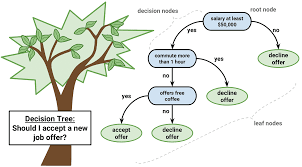

It is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

## Advantages of decision trees are:

* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation.
* The cost of using the tree is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data. However
* Able to handle multi-output problems.
* Possible to validate a model using statistical tests.

## Disadvantages of decision trees include:

* Decision-tree learners can create over-complex trees that do not generalize the data well (overfitting).
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated.
* Predictions of decision trees are neither smooth nor continuous.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.

In [25]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=4, n_informative=4, n_targets=1, noise=50)

In [26]:
df = pd.DataFrame({'feature1':X[:,0],'feature2':X[:,1],'feature3':X[:,2],'feature4':X[:,3],'target':y})
df.head()

,feature1,feature2,feature3,feature4,target
0,-0.043357,-2.184769,0.489502,1.288936,101.092268
1,-1.797566,-0.476042,-2.193144,-0.496250,-378.144720
2,0.358246,-0.947135,0.220966,0.405005,77.514192
3,-0.122188,-1.044009,-1.584565,0.196716,-3.131972
4,-0.774959,-0.130550,0.110061,0.640549,-2.641993


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [29]:
rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 5)
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5)

In [30]:
y_pred = rt.predict(X_test)

In [31]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 61.50892482564227
MSE 5866.316287499614
R2 score 0.5211859006278297


# Hyperparameter Tuning

In [32]:
param_grid = {
    'max_depth': [2,4,6,8,None],
    'criterion': ['squared_error', 'absolute_error'],
    'max_features': [1,2,3,4],
    'min_samples_split':[0.25,0.5,1.0]
}

In [35]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)
reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 4, 6, 8, None],
                         'max_features': [1, 2, 3, 4],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [36]:
reg.best_score_

0.5682034847478585

In [37]:
reg.best_params_

{'criterion': 'absolute_error',
 'max_depth': None,
 'max_features': 3,
 'min_samples_split': 0.25}

# Feature Importance

In [38]:
rt.feature_importances_

array([0.54237035, 0.03384627, 0.10819627, 0.31558711])